Topic 0: ['startups', 'innovate', 'applications', 'ai', 'new']
Topic 1: ['technology', 'machine', 'learning', 'ai', 'new']
Topic 2: ['records', 'office', 'movie', 'box', 'release']


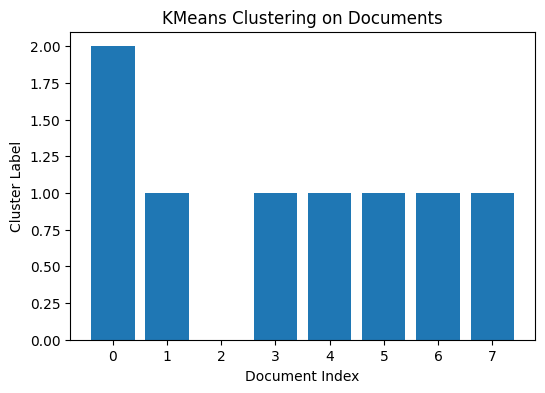

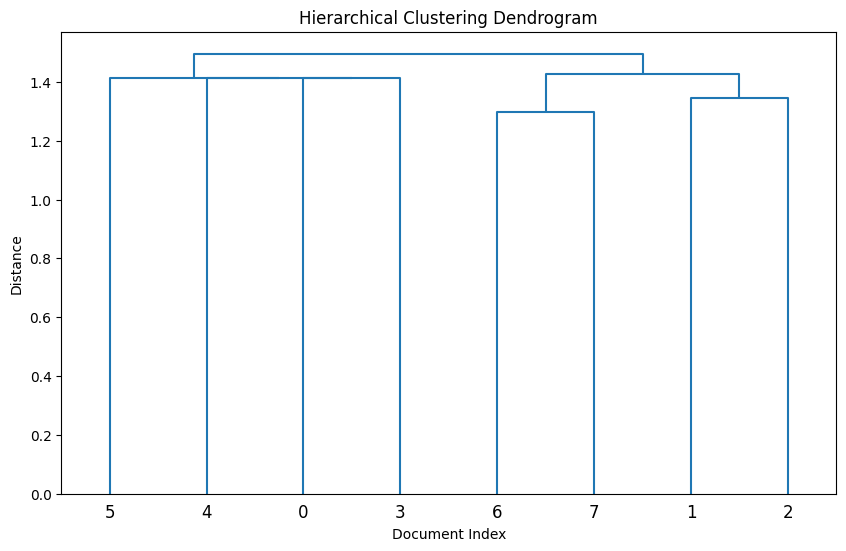

In [1]:
# Title: Document Clustering

# Task 1: A news platform uses Latent Dirichlet Allocation (LDA) to group articles by topic. Implement LDA on a corpus of news articles to identify underlying topics.
# Task 2: A library uses k-means clustering to organize digital books based on content similarity. Use a text vectorization method (e.g., TF-IDF) and apply k-means.
# Task 3: A law firm leverages agglomerative clustering to organize legal documents related to similar cases. Perform hierarchical clustering and visualize using a dendrogram.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample corpus
corpus = [
    "The economy is growing rapidly in the third quarter.",
    "Government announces new economic reforms.",
    "New movie release breaks box office records.",
    "Film critics praise the acting and direction.",
    "The court ruled in favor of the defendant.",
    "Legal experts discuss implications of the judgment.",
    "Technology advances in AI and machine learning.",
    "Startups innovate with new AI applications.",
]

# Task 1: LDA Topic Modeling
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(corpus)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(count_data)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:", [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

# Task 2: KMeans Clustering with TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(tfidf_matrix)

plt.figure(figsize=(6, 4))
plt.bar(range(len(labels_kmeans)), labels_kmeans)
plt.title("KMeans Clustering on Documents")
plt.xlabel("Document Index")
plt.ylabel("Cluster Label")
plt.show()

# Task 3: Agglomerative Clustering with Dendrogram
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(len(corpus)))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Document Index")
plt.ylabel("Distance")
plt.show()
